In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\PingPong\\gpu_intelMPI'

## 
Function that given the filename plot the effective bandwidth as function of message size, fit the communication time model given by `comm_model` and create csv files as required by the assignment

In [3]:
def comm_model(m_size, latency, rev_b):
	return rev_b * m_size + latency

def line_prepender(filename, line):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip('\r\n') + '\n' + content)


def graph_and_fit_and_csv(filename, filename_out, list_nodes_involved, command_line_used):
    
    #loading data
    data_frame = pd.read_csv(filename)
    data_frame = data_frame.drop(columns=['Unnamed: 0'])
    data = data_frame.values

    # Plotting Effective bandwidth vs Number of bytes
    x, y = data[:, 0], data[:, 3]
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x,y)
    plt.title(filename)
    plt.xscale("log")
    plt.xlabel("N [Bytes]")
    plt.ylabel("B [MBytes/sec]")
    plt.show()

    # Plotting and fitting Time vs Number of bytes
    x, y = data[:, 0], data[:, 2]
    popt, _ = curve_fit(comm_model, x, y)
    latency, rev_b = popt
    bandwidth = 1/rev_b
    #print('y = %.0f * x + %.2f' % (bandwidth, latency))
    plt.figure()
    plt.scatter(x, y)
    x_line = np.arange(min(x), max(x), 100000)
    y_line = comm_model(x_line, latency, rev_b)
    plt.plot(x_line, y_line, '-', color='red', label='fit: b = %.1f [bytes/us], latency = %.2f [us]' % ((bandwidth), latency))
    plt.title(filename)
    plt.xlabel("N [bytes]")
    plt.ylabel("Time [microseconds]")
    plt.legend()
    plt.show()

    # Adding cols to dataframe
    t = comm_model(x, latency, rev_b)
    t = np.round(t,2)
    Mbytes_second = np.round(np.divide(x, t),2)
    data_frame['t[usec] computed'] = t
    data_frame['Mbytes/sec computed'] = Mbytes_second

    # Creating output csv file
    data_frame.to_csv(filename_out,index=False)
    header_line_3 = f"#header_line 3: (latency, bandwidth) computed by fitting data = ({round(latency,2)},{round(1/rev_b,1)})"
    header_line_2 = f'#header_line 2: list of nodes involved: {list_nodes_involved}'
    header_line_1 = f'#header_line 1: command line used: {command_line_used}'

    line_prepender(filename_out, header_line_3)
    line_prepender(filename_out, header_line_2)
    line_prepender(filename_out, header_line_1)

## Inside socket

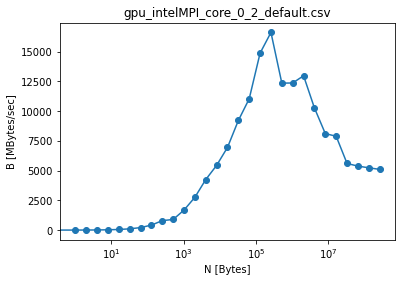

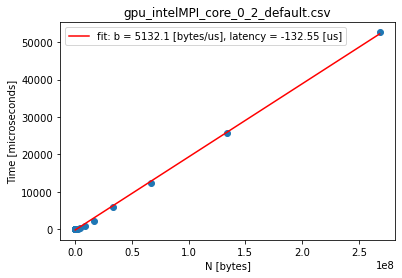

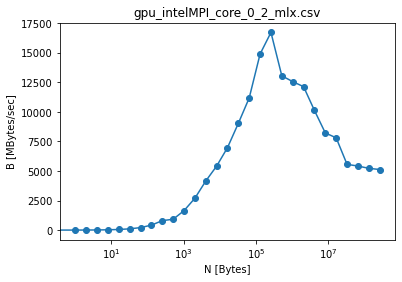

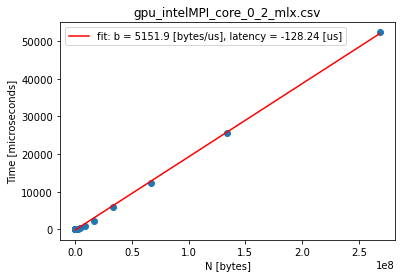

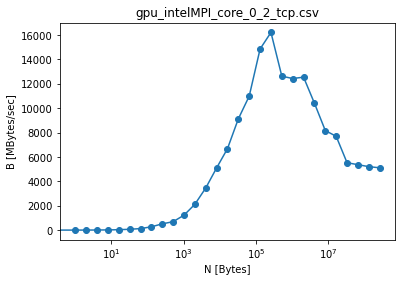

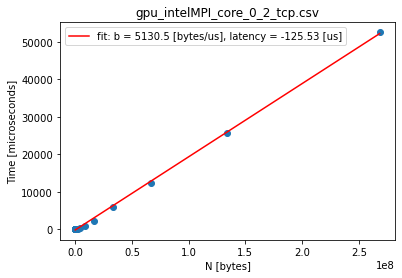

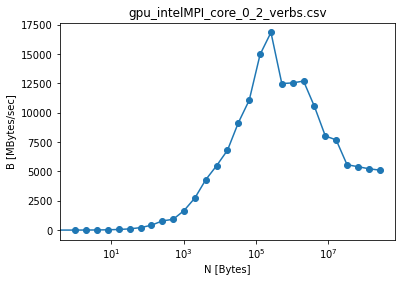

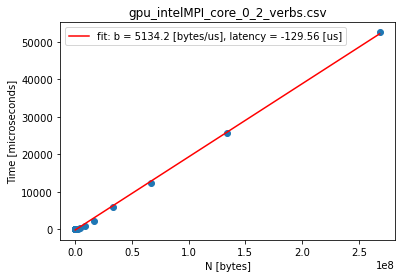

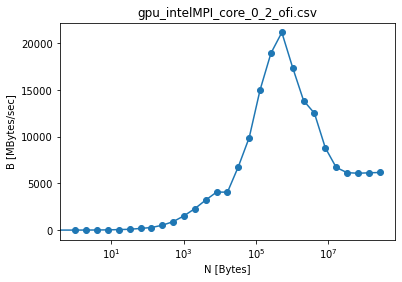

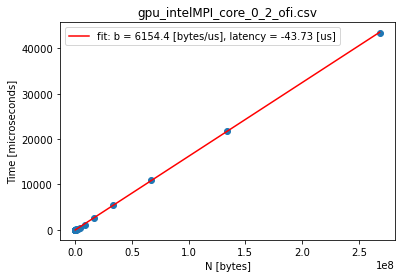

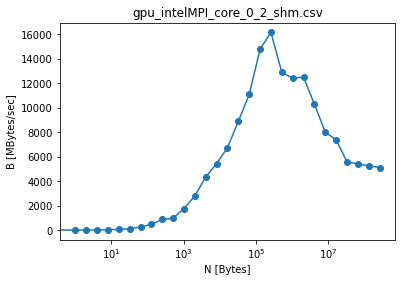

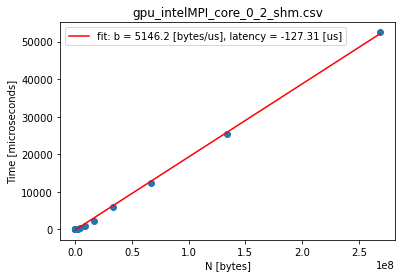

In [4]:
# contiguous cores
graph_and_fit_and_csv('gpu_intelMPI_core_0_2_default.csv', 'gpu_intelMPI_core_0_2_default_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,2 ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_2_mlx.csv', 'gpu_intelMPI_core_0_2_mlx_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,2 -genv I_MPI_OFI_PROVIDER=mlx ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_2_tcp.csv', 'gpu_intelMPI_core_0_2_tcp_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,2 -genv I_MPI_OFI_PROVIDER=tcp ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_2_verbs.csv', 'gpu_intelMPI_core_0_2_verbs_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,2 -genv I_MPI_OFI_PROVIDER=verbs ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_2_ofi.csv', 'gpu_intelMPI_core_0_2_ofi_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,2 -genv I_MPI_FABRICS=ofi ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_2_shm.csv', 'gpu_intelMPI_core_0_2_shm_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,2 -genv I_MPI_FABRICS=shm ./IMB-MPI1 PingPong -msglog 28')


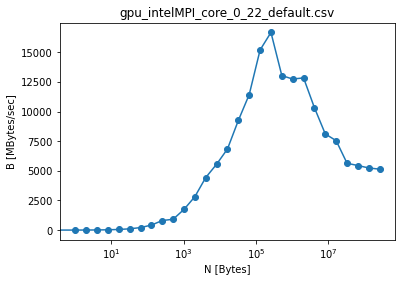

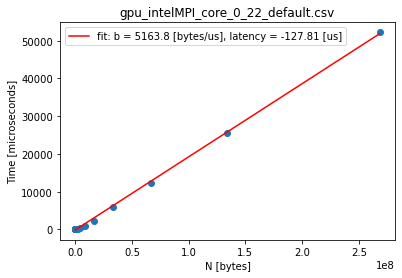

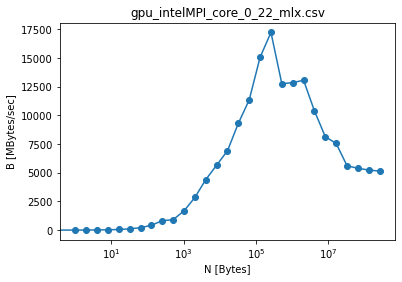

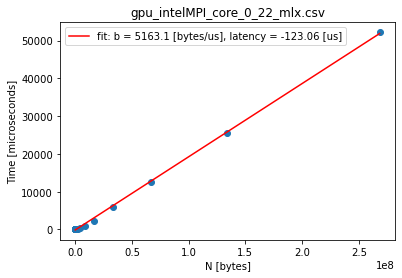

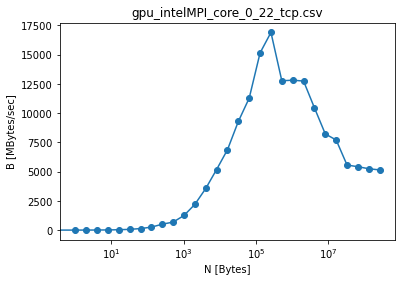

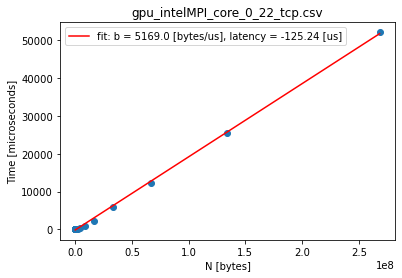

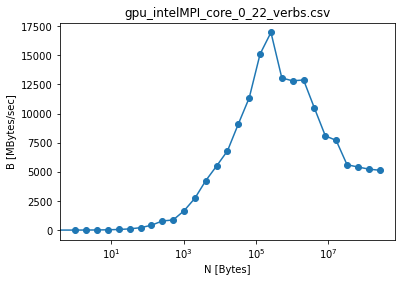

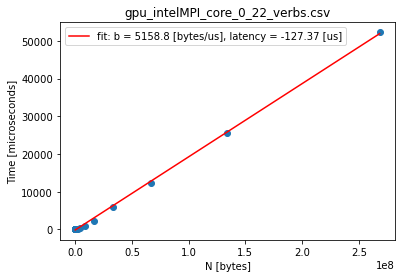

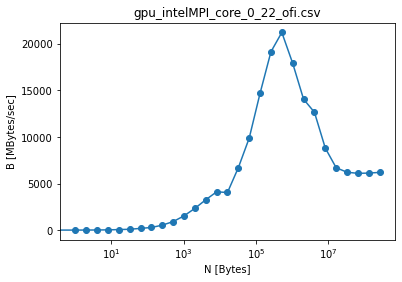

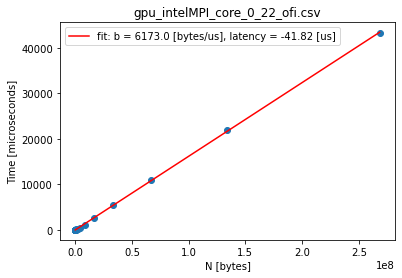

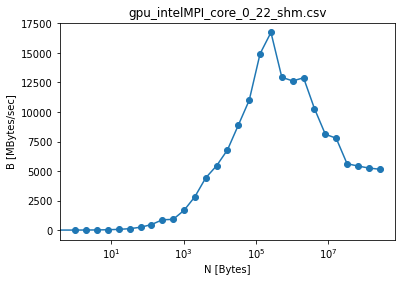

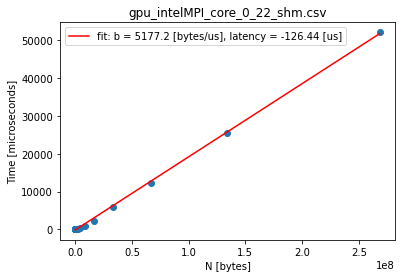

In [6]:
# far away cores
graph_and_fit_and_csv('gpu_intelMPI_core_0_22_default.csv', 'gpu_intelMPI_core_0_22_default_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,22 ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_22_mlx.csv', 'gpu_intelMPI_core_0_22_mlx_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,22 -genv I_MPI_OFI_PROVIDER=mlx ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_22_tcp.csv', 'gpu_intelMPI_core_0_22_tcp_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,22 -genv I_MPI_OFI_PROVIDER=tcp ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_22_verbs.csv', 'gpu_intelMPI_core_0_22_verbs_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,22 -genv I_MPI_OFI_PROVIDER=verbs ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_22_ofi.csv', 'gpu_intelMPI_core_0_22_ofi_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,22 -genv I_MPI_FABRICS=ofi ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_core_0_22_shm.csv', 'gpu_intelMPI_core_0_22_shm_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,22 -genv I_MPI_FABRICS=shm ./IMB-MPI1 PingPong -msglog 28')

## 
Function that takes a list of filenames and plot the effective bandwidth as function of the message size

In [8]:
def together_plot(filenameList, plotTiltle):

    listOfDataframe = []

    for filename in filenameList:
        data_frame = pd.read_csv(filename)
        data_frame = data_frame.drop(columns=['Unnamed: 0'])
        data = data_frame.values
        listOfDataframe.append(data)

    x0, y0 = listOfDataframe[0][:, 0], listOfDataframe[0][:, 3]
    x1, y1 = listOfDataframe[1][:, 0], listOfDataframe[1][:, 3]
    x2, y2 = listOfDataframe[2][:, 0], listOfDataframe[2][:, 3]
    x3, y3 = listOfDataframe[3][:, 0], listOfDataframe[3][:, 3]
    x4, y4 = listOfDataframe[4][:, 0], listOfDataframe[4][:, 3]
    x5, y5 = listOfDataframe[5][:, 0], listOfDataframe[5][:, 3]
    
    plt.figure()

    plt.scatter(x0, y0, marker='.')
    plt.plot(x0,y0, label = 'default')
    plt.scatter(x1, y1, marker='.')
    plt.plot(x1,y1, label='mlx')
    plt.scatter(x2, y2, marker='.')
    plt.plot(x2,y2, label='ofi')
    plt.scatter(x3, y3, marker='.')
    plt.plot(x3,y3, label = 'shm')
    plt.scatter(x4, y4, marker='.')
    plt.plot(x4,y4, label='tcp')
    plt.scatter(x5, y5, marker='.')
    plt.plot(x5,y5, label='verbs')

    plt.title(plotTiltle)
    plt.xscale("log")
    plt.xlabel("N [Bytes]")
    plt.ylabel(r'$B$'+' [MBytes/sec]')
    plt.legend()
    plt.show()
    #return listOfDataframe

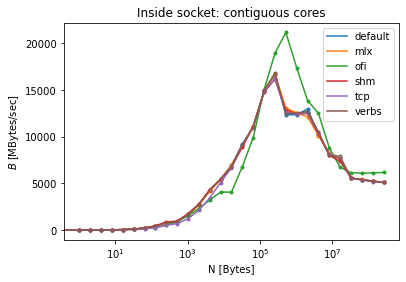

In [9]:
filenameList = ['gpu_intelMPI_core_0_2_default.csv', 'gpu_intelMPI_core_0_2_mlx.csv', 'gpu_intelMPI_core_0_2_ofi.csv','gpu_intelMPI_core_0_2_shm.csv','gpu_intelMPI_core_0_2_tcp.csv','gpu_intelMPI_core_0_2_verbs.csv']
pltTtitle = 'Inside socket: contiguous cores'
together_plot(filenameList, plotTiltle=pltTtitle)

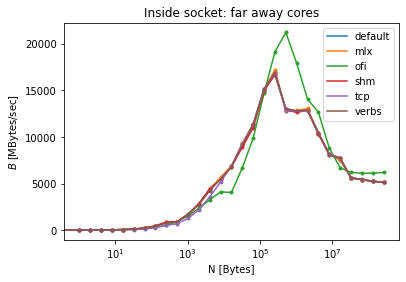

In [10]:
filenameList = ['gpu_intelMPI_core_0_22_default.csv', 'gpu_intelMPI_core_0_22_mlx.csv', 'gpu_intelMPI_core_0_22_ofi.csv','gpu_intelMPI_core_0_22_shm.csv','gpu_intelMPI_core_0_22_tcp.csv','gpu_intelMPI_core_0_22_verbs.csv']
pltTtitle = 'Inside socket: far away cores'
together_plot(filenameList, plotTiltle=pltTtitle)

## Socket-to-socket communication

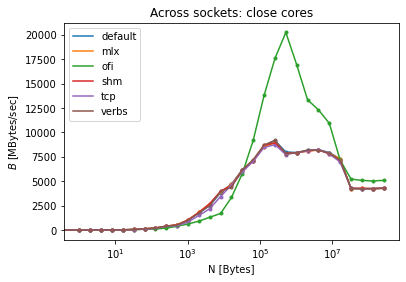

In [11]:
filenameList = ['gpu_intelMPI_socket_0_1_default.csv', 'gpu_intelMPI_socket_0_1_mlx.csv', 'gpu_intelMPI_socket_0_1_ofi.csv','gpu_intelMPI_socket_0_1_shm.csv','gpu_intelMPI_socket_0_1_tcp.csv','gpu_intelMPI_socket_0_1_verbs.csv']
pltTtitle = 'Across sockets: close cores'
together_plot(filenameList, plotTiltle=pltTtitle)

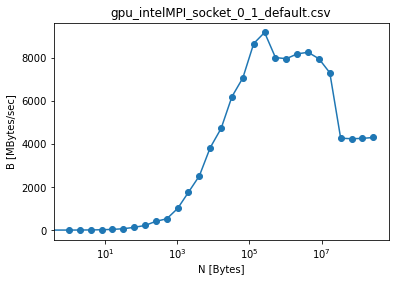

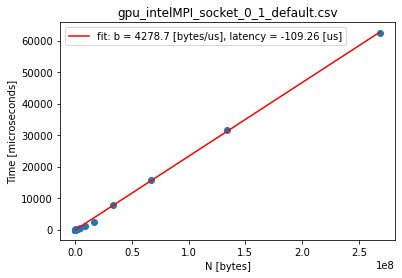

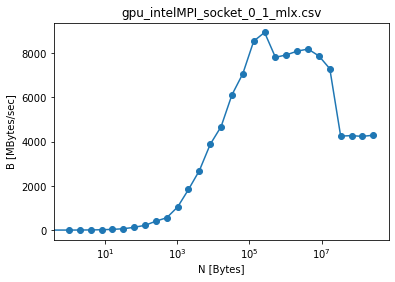

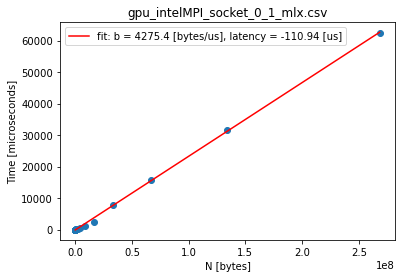

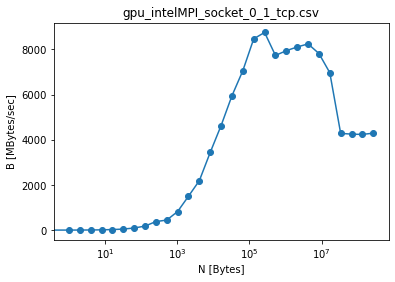

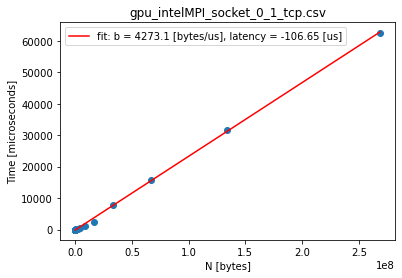

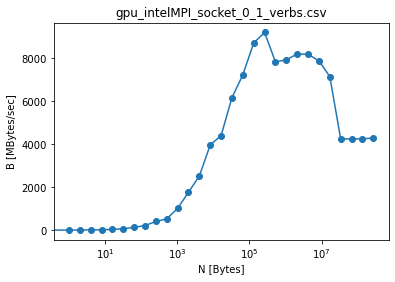

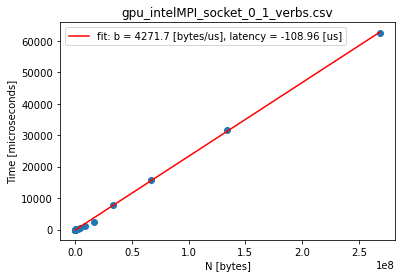

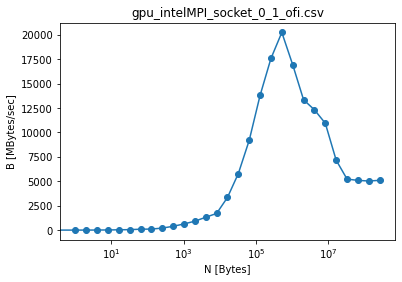

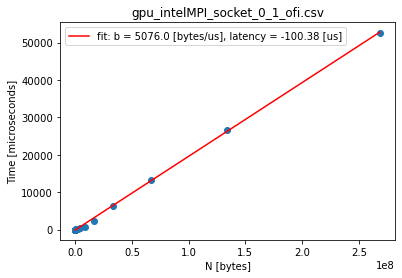

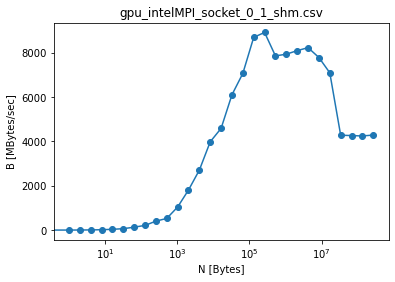

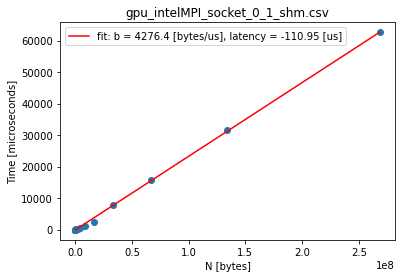

In [12]:
# close away cores
graph_and_fit_and_csv('gpu_intelMPI_socket_0_1_default.csv', 'gpu_intelMPI_socket_0_1_default_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,1 ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_1_mlx.csv', 'gpu_intelMPI_socket_0_1_mlx_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,1 -genv I_MPI_OFI_PROVIDER=mlx ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_1_tcp.csv', 'gpu_intelMPI_socket_0_1_tcp_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,1 -genv I_MPI_OFI_PROVIDER=tcp ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_1_verbs.csv', 'gpu_intelMPI_socket_0_1_verbs_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,1 -genv I_MPI_OFI_PROVIDER=verbs ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_1_ofi.csv', 'gpu_intelMPI_socket_0_1_ofi_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,1 -genv I_MPI_FABRICS=ofi ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_1_shm.csv', 'gpu_intelMPI_socket_0_1_shm_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,1 -genv I_MPI_FABRICS=shm ./IMB-MPI1 PingPong -msglog 28')

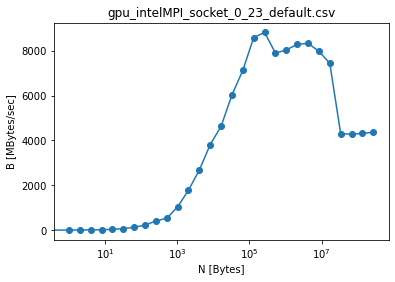

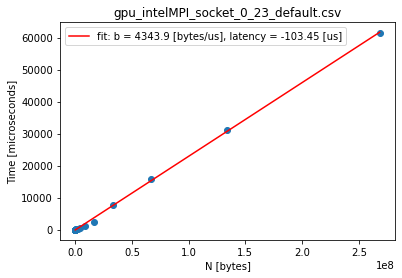

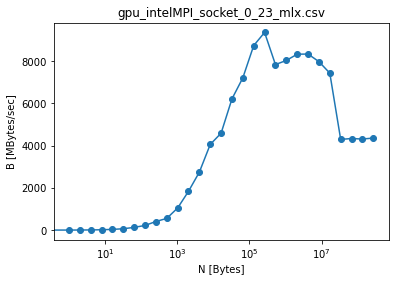

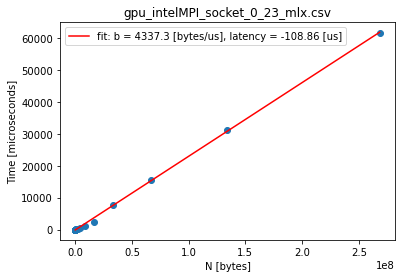

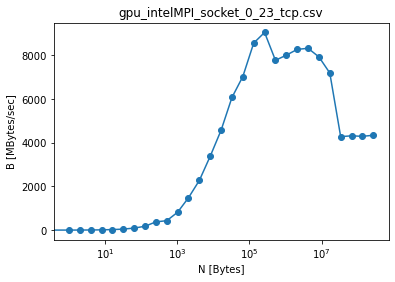

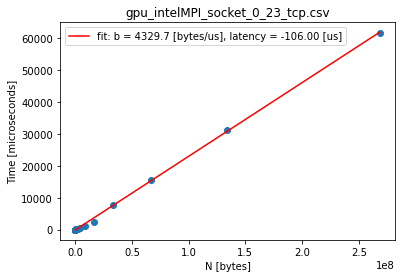

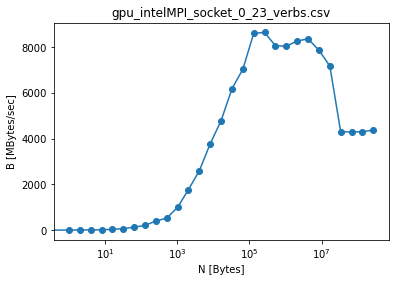

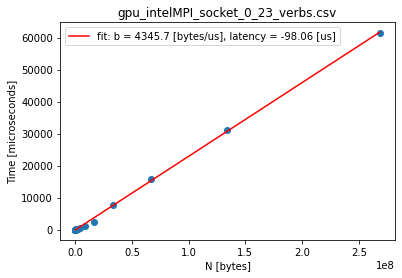

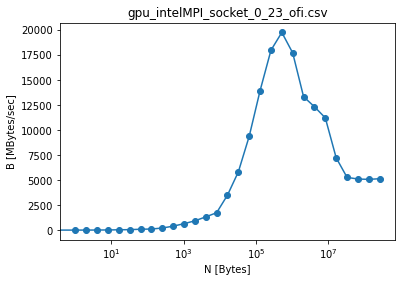

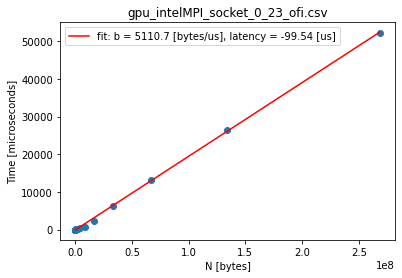

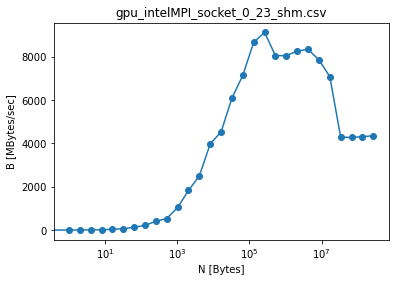

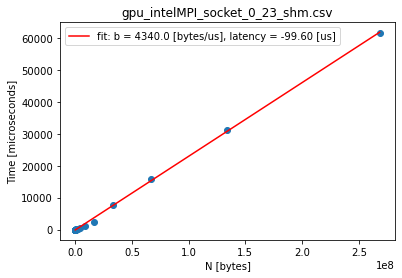

In [13]:
# far away cores
graph_and_fit_and_csv('gpu_intelMPI_socket_0_23_default.csv', 'gpu_intelMPI_socket_0_23_default_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,23 ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_23_mlx.csv', 'gpu_intelMPI_socket_0_23_mlx_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,23 -genv I_MPI_OFI_PROVIDER=mlx ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_23_tcp.csv', 'gpu_intelMPI_socket_0_23_tcp_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,23 -genv I_MPI_OFI_PROVIDER=tcp ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_23_verbs.csv', 'gpu_intelMPI_socket_0_23_verbs_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,32 -genv I_MPI_OFI_PROVIDER=verbs ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_23_ofi.csv', 'gpu_intelMPI_socket_0_23_ofi_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,23 -genv I_MPI_FABRICS=ofi ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_socket_0_23_shm.csv', 'gpu_intelMPI_socket_0_23_shm_out.csv', 'ct1pg-gnode001', 'mpirun -np 2 -genv I_MPI_DEBUG=4 -genv I_MPI_PIN_PROCESSOR_LIST=0,23 -genv I_MPI_FABRICS=shm ./IMB-MPI1 PingPong -msglog 28')

## Node-to-node communication

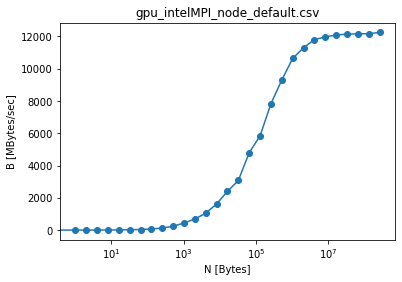

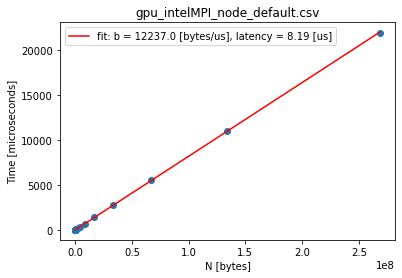

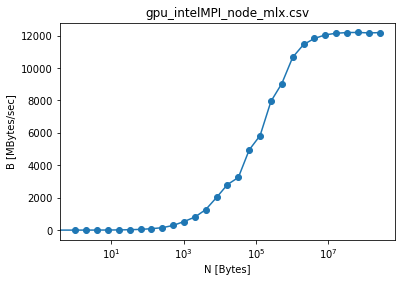

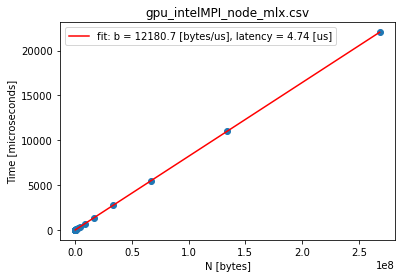

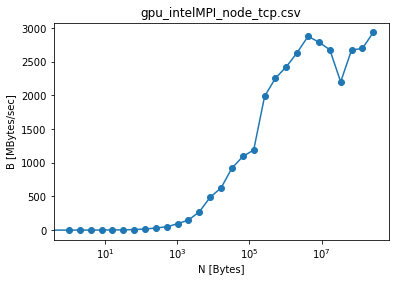

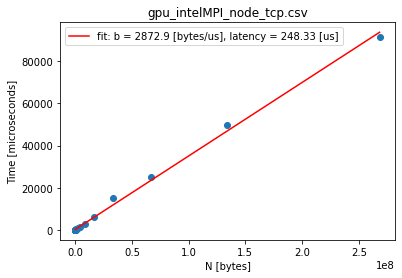

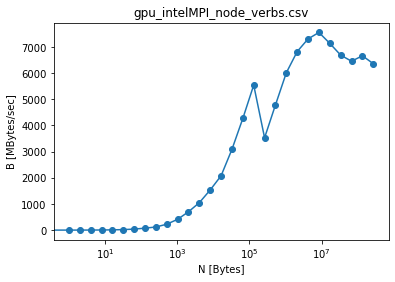

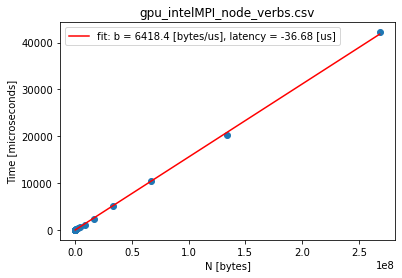

In [15]:
graph_and_fit_and_csv('gpu_intelMPI_node_default.csv', 'gpu_intelMPI_node_default_out.csv', 'ct1pg-gnode001 + ct1pg-gnode003', 'mpirun -np 2 -ppn 1 -genv I_MPI_DEBUG=4 -f $PBS_NODEFILE ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_node_mlx.csv', 'gpu_intelMPI_node_mlx_out.csv', 'ct1pg-gnode001 + ct1pg-gnode003', 'mpirun -np 2 -ppn 1 -genv I_MPI_DEBUG=4 -genv I_MPI_OFI_PROVIDER=mlx -f $PBS_NODEFILE ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_node_tcp.csv', 'gpu_intelMPI_node_tcp_out.csv', 'ct1pg-gnode001 + ct1pg-gnode003', 'mpirun -np 2 -ppn 1 -genv I_MPI_DEBUG=4 -genv I_MPI_OFI_PROVIDER=tcp -f $PBS_NODEFILE ./IMB-MPI1 PingPong -msglog 28')
graph_and_fit_and_csv('gpu_intelMPI_node_verbs.csv', 'gpu_intelMPI_node_verbs_out.csv', 'ct1pg-gnode001 + ct1pg-gnode003', 'mpirun -np 2 -ppn 1 -genv I_MPI_DEBUG=4 -genv I_MPI_OFI_PROVIDER=verbs -f $PBS_NODEFILE ./IMB-MPI1 PingPong -msglog 28')


In [17]:
def together_plot_nodes(filenameList, plotTiltle):

    listOfDataframe = []

    for filename in filenameList:
        data_frame = pd.read_csv(filename)
        data_frame = data_frame.drop(columns=['Unnamed: 0'])
        data = data_frame.values
        listOfDataframe.append(data)

    x0, y0 = listOfDataframe[0][:, 0], listOfDataframe[0][:, 3]
    x1, y1 = listOfDataframe[1][:, 0], listOfDataframe[1][:, 3]
    x2, y2 = listOfDataframe[2][:, 0], listOfDataframe[2][:, 3]
    x3, y3 = listOfDataframe[3][:, 0], listOfDataframe[3][:, 3]
    
    plt.figure()

    plt.scatter(x0, y0, marker='.')
    plt.plot(x0,y0, label = 'default')
    plt.scatter(x1, y1, marker='.')
    plt.plot(x1,y1, label='mlx')
    plt.scatter(x2, y2, marker='.')
    plt.plot(x2,y2, label='tcp')
    plt.scatter(x3, y3, marker='.')
    plt.plot(x3,y3, label = 'verbs')

    plt.title(plotTiltle)
    plt.xscale("log")
    plt.xlabel("N [Bytes]")
    plt.ylabel(r'$B$'+' [MBytes/sec]')
    plt.legend()
    plt.show()
    #return listOfDataframe

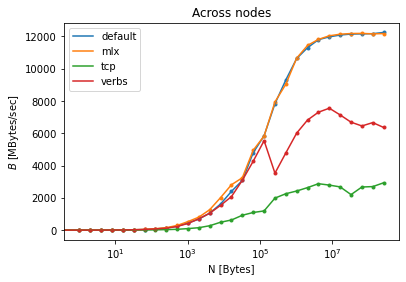

In [18]:
filenameList = ['gpu_intelMPI_node_default.csv', 'gpu_intelMPI_node_mlx.csv', 'gpu_intelMPI_node_tcp.csv','gpu_intelMPI_node_verbs.csv']
pltTtitle = 'Across nodes'
together_plot_nodes(filenameList, plotTiltle=pltTtitle)

In [65]:
def together_plot_fit_nodes(filenameList):

    listOfDataframe = []

    for filename in filenameList:
        data_frame = pd.read_csv(filename)
        data_frame = data_frame.drop(columns=['Unnamed: 0'])
        data = data_frame.values
        listOfDataframe.append(data)


    # Plotting the fit
    z0, p0 = listOfDataframe[0][:, 0], listOfDataframe[0][:, 2]
    z1, p1 = listOfDataframe[1][:, 0], listOfDataframe[1][:, 2]
    popt0, _ = curve_fit(comm_model, z0, p0)
    popt1, _ = curve_fit(comm_model, z1, p1)
    latency0, rev_b0 = popt0
    bandwidth0 = 1/rev_b0
    latency1, rev_b1 = popt1
    bandwidth1 = 1/rev_b1
    #print('y = %.0f * x + %.2f' % (bandwidth, latency))

    plt.figure()
    plt.scatter(z0, p0, marker='x', color='black', alpha=0.5)
    z0_line = np.arange(min(z0), max(z0), 100000)
    p0_line = comm_model(z0_line, latency0, rev_b0)
    plt.plot(z0_line, p0_line, '-', label='default: b = %.1f [bytes/us], latency = %.2f [us]' % ((bandwidth0), latency0))
    plt.scatter(z1, p1, color='black', marker='2', alpha=0.5)
    z1_line = np.arange(min(z1), max(z1), 100000)
    p1_line = comm_model(z1_line, latency1, rev_b1)
    plt.plot(z1_line, p1_line, '-', label='tcp:       b = %.1f [bytes/us], latency = %.2f [us]' % ((bandwidth1), latency1))



    plt.title("Communication time across nodes")
    plt.xlabel("N [bytes]")
    plt.ylabel('Time '+r'$[\mu s]$')
    plt.legend()
    plt.show()

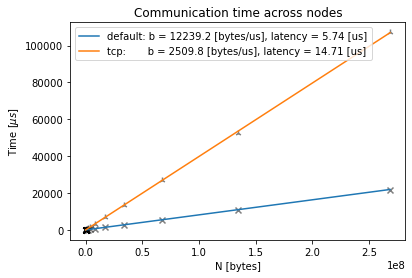

In [66]:
filenameList = ['thin_intelMPI_node_default.csv','thin_intelMPI_node_tcp.csv']
together_plot_fit_nodes(filenameList)